# Quick Plotting

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def f1(x):
    return x**2 - 10

In [3]:
x = list(range(-10, 11))
x

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
y = [f1(i) for i in x]
y

[90,
 71,
 54,
 39,
 26,
 15,
 6,
 -1,
 -6,
 -9,
 -10,
 -9,
 -6,
 -1,
 6,
 15,
 26,
 39,
 54,
 71,
 90]

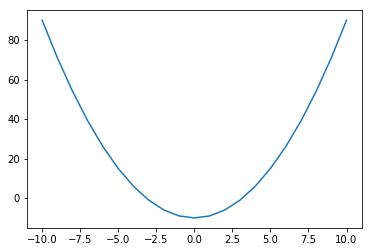

In [5]:
plt.plot(x, y)
plt.show()

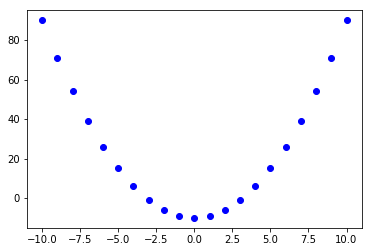

In [6]:
plt.plot(x, y, 'ob')
plt.show()

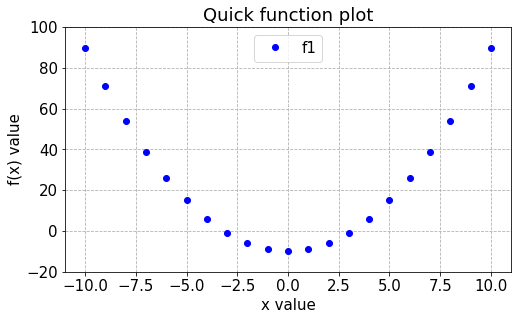

In [7]:
font = {'size': 15}
mpl.rc('font', **font)
plt.figure(figsize=(8,4.5))
plt.plot(x, y, 'ob', label="f1")
plt.legend()
plt.title("Quick function plot")
plt.xlim(-11,11)
plt.ylim(-20, 100)
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.savefig('f1.png')
plt.legend(loc = 9)
plt.grid(linestyle='--')
plt.show()

### Reference
For location of legend
https://matplotlib.org/1.3.0/api/legend_api.html

'best'         : 0, (only implemented for axis legends)

'upper right'  : 1,

'upper left'   : 2,

'lower left'   : 3,

'lower right'  : 4,

'right'        : 5,

'center left'  : 6,

'center right' : 7,

'lower center' : 8,

'upper center' : 9,

'center'       : 10,

# Adding another series on the same / different axis

In [8]:
import numpy as np

In [9]:
x2 = np.linspace(-10,10, 5000)
x2

array([-10.       ,  -9.9959992,  -9.9919984, ...,   9.9919984,
         9.9959992,  10.       ])

In [10]:
def f2(x):
    return np.sin( x)


In [11]:
%%timeit -n 3
y = [f2(i)  for i in x2]

3 loops, best of 3: 14.2 ms per loop


In [12]:
y = map(f2,x2)
list(y) == [f2(i)  for i in x2]

True

In [13]:
%%timeit -n 3
y = map(f2,x2)
y_val = list(y)

3 loops, best of 3: 13.9 ms per loop


In [14]:
%%timeit -n 3
vfunc = np.vectorize(f2)
y_vec2 = vfunc(x2)

3 loops, best of 3: 8.55 ms per loop


In [15]:
%%timeit -n 3
y_for = []
for i in x2:
    y_for.append(f2(i))

3 loops, best of 3: 15.4 ms per loop


In [16]:
x2 = np.linspace(-10,10, 100)

In [17]:
%%timeit -n 3
y = [f2(i)  for i in x2]

3 loops, best of 3: 322 µs per loop


In [18]:
%%timeit -n 3
y = map(f2,x2)
y_val = list(y)

3 loops, best of 3: 268 µs per loop


In [19]:
%%timeit -n 3
vfunc = np.vectorize(f2)
y_vec2 = vfunc(x2)

3 loops, best of 3: 282 µs per loop


map and list comprehension give similar performance for these cases

In [20]:
def run_map(f2,x2):
    y = map(f2,x2)
    y_val = list(y)

In [21]:
%timeit -n 3 run_map(f2,x2)

3 loops, best of 3: 587 µs per loop


In [22]:
# code run faster when put it in function, typically.

In [23]:
f3 = lambda x: 30 * np.sin(x)

x = np.linspace(-10,10, 100)
y1 = [f1(i) for i in x]
y3 = [f3(i) for i in x]


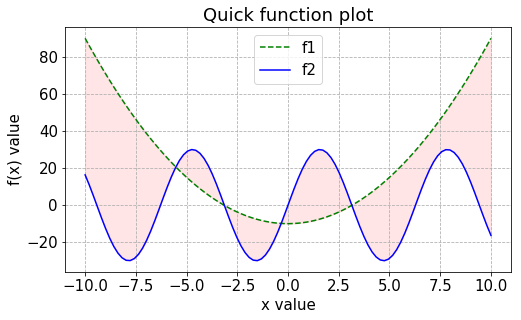

In [24]:
font = {'size': 15}
mpl.rc('font', **font)
plt.figure(figsize=(8,4.5))
plt.plot(x, y1, '--g', label="f1")
plt.plot(x, y3, '-b', label="f2")
plt.fill_between(x, y1, y3, color = 'red', alpha = 0.1)
plt.legend()
plt.title("Quick function plot")
# plt.xlim(-11,11)
# plt.ylim(-20, 100)
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.legend(loc = 0)
plt.grid(linestyle='--')
plt.savefig('f12.png')
plt.show()

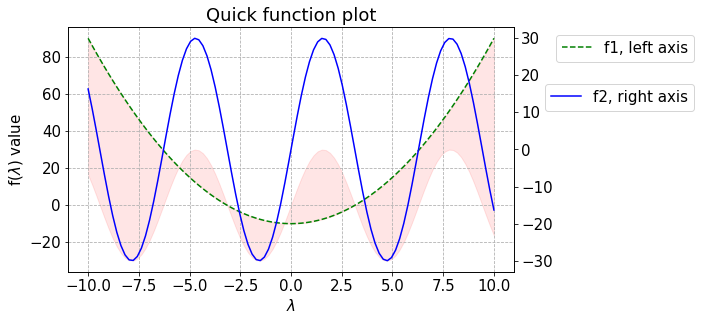

In [25]:
font = {'size': 15}
mpl.rc('font', **font)
plt.figure(figsize=(8,4.5))
plt.plot(x, y1, '--g', label="f1, left axis")

plt.fill_between(x, y1, y3, color = 'red', alpha = 0.1)
plt.legend(bbox_to_anchor=(1.42, 1))
plt.title("Quick function plot")
# plt.xlim(-11,11)
# plt.ylim(-20, 100)
plt.xlabel("$\lambda$")
plt.ylabel("f($\lambda$) value")

plt.grid(linestyle='--')

ax2 = plt.twinx()
ax2.plot(x, y3, '-b', label="f2, right axis")
lgd = ax2.legend(bbox_to_anchor=(1.42, 0.8))
plt.savefig('f12_outside.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Note:
If we put legend outside, we need to adjust the way to save figure. Otherwise, the extra part won't be saved.

# Heat Map Plot: Value represent by color (2D plot)

In [26]:
def fxy1(x,y):
    return((x * y + 10 * np.sin(5 * x)) * np.cos(0.4 * y))

In [27]:
x = np.arange(0,30,0.05)
y = np.arange(0,20,0.05)

In [28]:
x.max()

29.950000000000003

In [29]:
X, Y = np.meshgrid(x, y)

In [30]:
X

array([[  0.  ,   0.05,   0.1 , ...,  29.85,  29.9 ,  29.95],
       [  0.  ,   0.05,   0.1 , ...,  29.85,  29.9 ,  29.95],
       [  0.  ,   0.05,   0.1 , ...,  29.85,  29.9 ,  29.95],
       ..., 
       [  0.  ,   0.05,   0.1 , ...,  29.85,  29.9 ,  29.95],
       [  0.  ,   0.05,   0.1 , ...,  29.85,  29.9 ,  29.95],
       [  0.  ,   0.05,   0.1 , ...,  29.85,  29.9 ,  29.95]])

In [31]:
zvv = fxy1(X,Y)

In [32]:
zvv

array([[  0.        ,   2.47403959,   4.79425539, ...,  -9.99703579,
         -9.62601783,  -8.65650071],
       [  0.        ,   2.4760443 ,   4.79829557, ...,  -8.50283494,
         -8.12939168,  -7.15756895],
       [  0.        ,   2.47705663,   4.80041249, ...,  -7.00642691,
         -6.63070972,  -5.65697211],
       ..., 
       [ -0.        ,  -0.29781849,  -0.58242161, ..., -50.04611875,
        -50.16326175, -50.33182321],
       [ -0.        ,  -0.36709332,  -0.71790903, ..., -61.80070607,
        -61.94525792, -62.15314287],
       [ -0.        ,  -0.43632076,  -0.85330817, ..., -73.58993478,
        -73.76193708, -74.0091618 ]])

In [33]:
X[:,199]

array([ 9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,  9.95,
        9.95,  9.95,

In [34]:
Y[100,:]

array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5

In [35]:
fxy1(9.95,5)

-18.651889849686441

In [36]:
zvv[100,199]

-18.651889849686469

# plot with pcolor

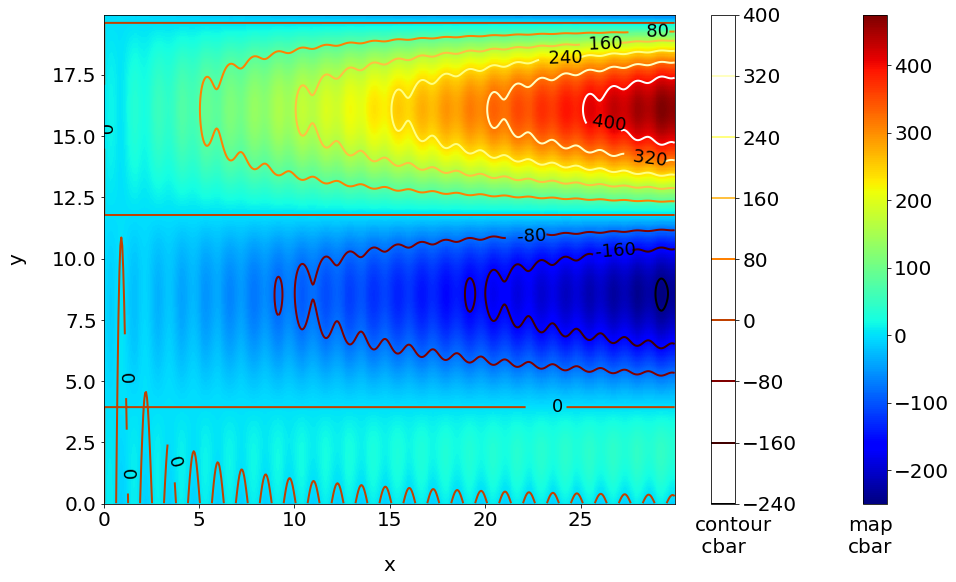

In [37]:
font = {'size': 20}
mpl.rc('font', **font)

plt.figure(figsize=(16,9))

contour = plt.contour(zvv,10, linewidths=2,
                   cmap=plt.cm.afmhot,
            origin = 'lower', extent=(x.min(), x.max(), y.min(), y.max()))
plt.clabel(contour, inline=True, fmt='%5d', fontsize=18, colors = 'black')
pcol = plt.pcolor(X,Y,zvv, cmap = 'jet')
plt.xlabel("\nx")
plt.ylabel("y\n")
plt.colorbar(pcol)
plt.colorbar(contour)
plt.text(31,-2,'contour\n cbar')
plt.text(39,-2,'map\ncbar')
plt.savefig('fxy_pcolor.png')
plt.show()

### Notice that zvv for x[199] and y[100], we use zvv[y_loc, x_loc]

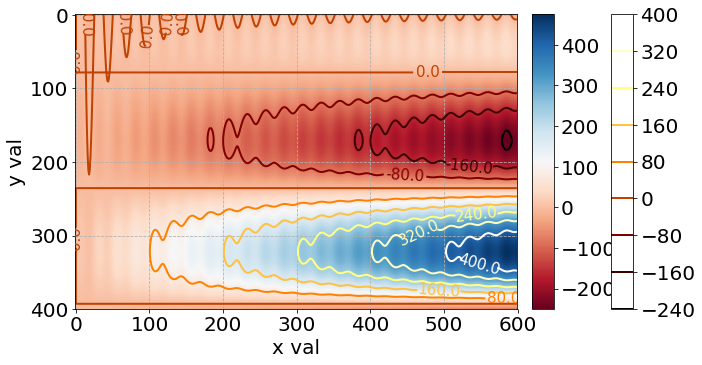

In [38]:
plt.figure(figsize=(10,10))
im = plt.imshow(zvv, cmap=plt.cm.RdBu, 
                )
cset = plt.contour(zvv,10, linewidths=2,
                   cmap=plt.cm.afmhot,
                   )
plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=15)

plt.xlabel("x val")
plt.ylabel("y val")
plt.grid(linestyle='--')
#resize color bar to match graph size
ax = plt.gca()
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.2)
cax2 = divider.append_axes("right", size="5%", pad=0.8)
plt.colorbar(im, cax = cax1)
plt.colorbar(cset, cax = cax2)
plt.savefig('fxy_col_map.png')
plt.show()

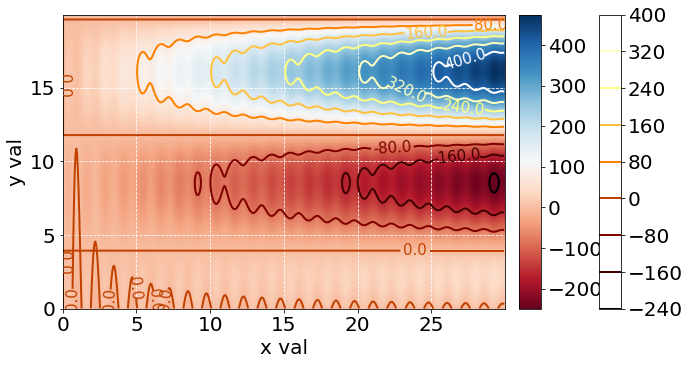

In [39]:
plt.figure(figsize=(10,10))
im = plt.imshow(zvv, cmap=plt.cm.RdBu, 
                origin = 'lower', extent=(x.min(), x.max(), y.min(), y.max()))
cset = plt.contour(zvv,10, linewidths=2,
                   cmap=plt.cm.afmhot,
                   origin = 'lower', extent=(x.min(), x.max(), y.min(), y.max()))
plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=15)

plt.xlabel("x val")
plt.ylabel("y val")
plt.grid(linestyle='--', c = 'w')
#resize color bar to match graph size
ax = plt.gca()
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.2)
cax2 = divider.append_axes("right", size="5%", pad=0.8)
plt.colorbar(im, cax = cax1)
plt.colorbar(cset, cax = cax2)
plt.savefig('fxy_col_map.png')
plt.show()

### Plotting trick
https://stackoverflow.com/questions/24897681/python-2d-color-map-with-imshow
### Resizing color bar, trick
https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
## For upside down image
https://stackoverflow.com/questions/8396101/invert-image-displayed-by-imshow-in-matplotlib

### To quickly calculate a look-up table without ploting, 
use zvv = fxy1(x[:,None],y[None,:])

This way there is no need for meshgrid (faster).

https://stackoverflow.com/questions/22774726/numpy-evaluate-function-on-a-grid-of-points

For plotting, we will need meshgrid anyway.

In [40]:
#recheck
[fxy1(i,np.pi / 2 / 0.4) for i in range(0,31)]

[0.0,
 -3.4671293508023123e-16,
 1.4780081737082051e-16,
 1.1195629711321006e-15,
 1.5208530864110784e-15,
 1.1212521100167247e-15,
 8.3775813734050028e-16,
 1.421025589182151e-15,
 2.3799209172135911e-15,
 2.6851576692889686e-15,
 2.2439301047696015e-15,
 2.0328737173751406e-15,
 2.6988633648432116e-15,
 3.6322514251883022e-15,
 3.8402950870430486e-15,
 3.3694347814422132e-15,
 3.2387601080755136e-15,
 3.979985001969842e-15,
 4.8756741371374453e-15,
 4.9870950335550122e-15,
 4.4991172035128435e-15,
 4.4553541067978236e-15,
 5.2630035806836283e-15,
 6.1094654222572682e-15,
 6.1265338953127517e-15,
 5.6342549296352665e-15,
 5.6824041172137546e-15,
 6.5464988056021024e-15,
 7.3330711086916991e-15,
 7.2597175724991043e-15,
 6.7760295357910901e-15]

In [41]:
np.pi / 2 / 0.4

3.9269908169872414

In [42]:
[fxy1(i,np.pi / 2 / 0.4) for i in range(0,31)]

[0.0,
 -3.4671293508023123e-16,
 1.4780081737082051e-16,
 1.1195629711321006e-15,
 1.5208530864110784e-15,
 1.1212521100167247e-15,
 8.3775813734050028e-16,
 1.421025589182151e-15,
 2.3799209172135911e-15,
 2.6851576692889686e-15,
 2.2439301047696015e-15,
 2.0328737173751406e-15,
 2.6988633648432116e-15,
 3.6322514251883022e-15,
 3.8402950870430486e-15,
 3.3694347814422132e-15,
 3.2387601080755136e-15,
 3.979985001969842e-15,
 4.8756741371374453e-15,
 4.9870950335550122e-15,
 4.4991172035128435e-15,
 4.4553541067978236e-15,
 5.2630035806836283e-15,
 6.1094654222572682e-15,
 6.1265338953127517e-15,
 5.6342549296352665e-15,
 5.6824041172137546e-15,
 6.5464988056021024e-15,
 7.3330711086916991e-15,
 7.2597175724991043e-15,
 6.7760295357910901e-15]

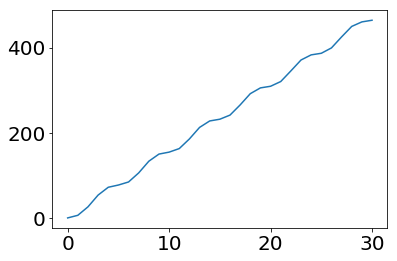

In [43]:
ytry = [fxy1(i,np.pi * 2 / 0.4) for i in range(0,31)]
xtry = range(0,31)

plt.figure()
plt.plot(xtry,ytry)
plt.show()

In [44]:
np.pi * 2 / 0.4

15.707963267948966

# A little bit of 3D
### Based on scipy tutorial (SciPy Reference Guide, Release 0.19.1, page 154)

In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [46]:
from scipy import special
def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

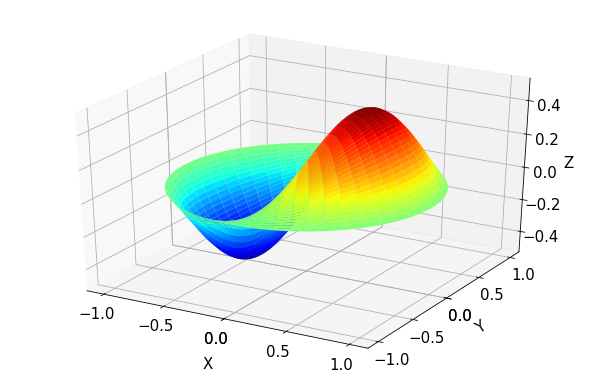

In [47]:
font = {'size': 15}
mpl.rc('font', **font)

fig = plt.figure(figsize=(8,5))
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=mpl.cm.jet)
ax.set_xticks([-1,-0.5,0,0.5,0,1])
ax.set_yticks([-1,-0.5,0,0.5,0,1])
ax.set_xlabel('\n\nX')
ax.set_ylabel('    \n Y')
ax.set_zlabel('Z')
plt.show()

In [48]:
x

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02040816,  0.02024061,  0.01974071, ...,  0.01974071,
         0.02024061,  0.02040816],
       [ 0.04081633,  0.04048123,  0.03948142, ...,  0.03948142,
         0.04048123,  0.04081633],
       ..., 
       [ 0.95918367,  0.95130879,  0.92781344, ...,  0.92781344,
         0.95130879,  0.95918367],
       [ 0.97959184,  0.9715494 ,  0.94755415, ...,  0.94755415,
         0.9715494 ,  0.97959184],
       [ 1.        ,  0.99179001,  0.96729486, ...,  0.96729486,
         0.99179001,  1.        ]])

In [49]:
y

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   2.60973799e-03,   5.17662416e-03, ...,
         -5.17662416e-03,  -2.60973799e-03,  -4.99855836e-18],
       [  0.00000000e+00,   5.21947599e-03,   1.03532483e-02, ...,
         -1.03532483e-02,  -5.21947599e-03,  -9.99711673e-18],
       ..., 
       [  0.00000000e+00,   1.22657686e-01,   2.43301336e-01, ...,
         -2.43301336e-01,  -1.22657686e-01,  -2.34932243e-16],
       [  0.00000000e+00,   1.25267424e-01,   2.48477960e-01, ...,
         -2.48477960e-01,  -1.25267424e-01,  -2.39930801e-16],
       [  0.00000000e+00,   1.27877162e-01,   2.53654584e-01, ...,
         -2.53654584e-01,  -1.27877162e-01,  -2.44929360e-16]])

In [50]:
x.shape

(50, 50)

In [51]:
y.shape

(50, 50)

In [52]:
x[5,:]

array([ 0.10204082,  0.10120306,  0.09870356,  0.09458334,  0.08891007,
        0.0817769 ,  0.07330095,  0.06362141,  0.0528972 ,  0.04130442,
        0.02903343,  0.0162857 ,  0.00327057, -0.00979827, -0.02270622,
       -0.03524133, -0.04719778, -0.05837925, -0.06860213, -0.07769857,
       -0.08551919, -0.0919356 , -0.09684242, -0.1001591 , -0.10183116,
       -0.10183116, -0.1001591 , -0.09684242, -0.0919356 , -0.08551919,
       -0.07769857, -0.06860213, -0.05837925, -0.04719778, -0.03524133,
       -0.02270622, -0.00979827,  0.00327057,  0.0162857 ,  0.02903343,
        0.04130442,  0.0528972 ,  0.06362141,  0.07330095,  0.0817769 ,
        0.08891007,  0.09458334,  0.09870356,  0.10120306,  0.10204082])

## Redo the contour in 3D and compare the results

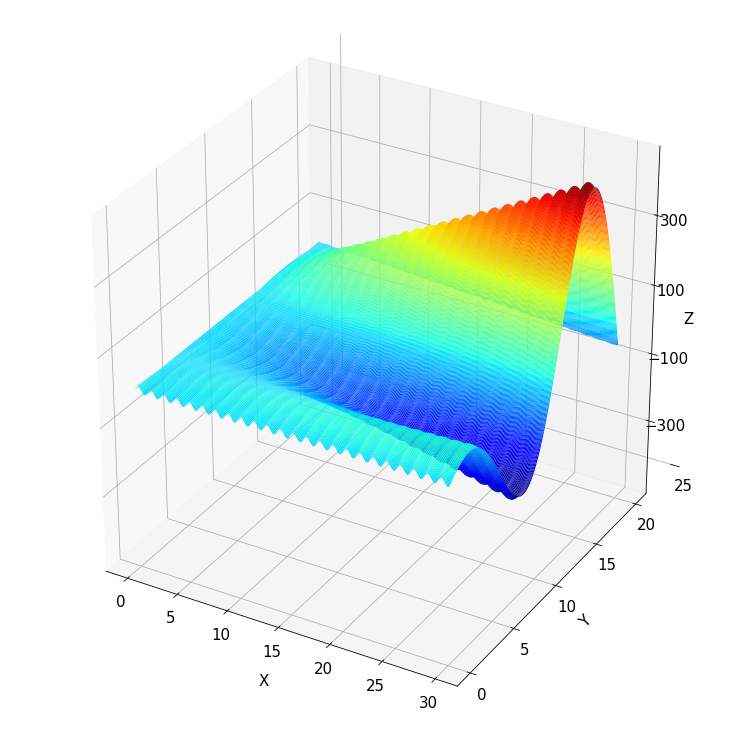

In [53]:
x = np.arange(0,30,0.1)
y = np.arange(0,20,0.1)
X, Y = np.meshgrid(x, y)
zvv = fxy1(X,Y)
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot_surface(X, Y, zvv, rstride=1, cstride=1, cmap=mpl.cm.jet)
ax.set_xlabel('\n\nX')
ax.set_ylabel('    \n Y')
ax.set_yticks(np.arange(0,30,5))
ax.set_zlabel('Z')
ax.set_zticks(np.arange(-300,450,200))
ax.set_zlim(bottom=-500)
plt.show()

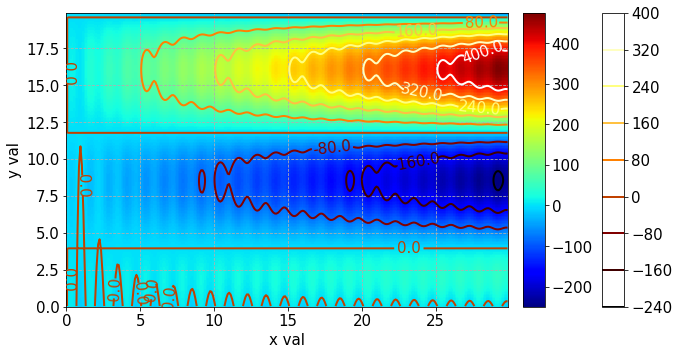

In [54]:
plt.figure(figsize=(10,10))
im = plt.imshow(zvv, cmap=plt.cm.jet, 
                origin = 'lower', extent=(x.min(), x.max(), y.min(), y.max()))
cset = plt.contour(zvv,10, linewidths=2,
                   cmap=plt.cm.afmhot,
                   origin = 'lower', extent=(x.min(), x.max(), y.min(), y.max()))
plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=15)

plt.xlabel("x val")
plt.ylabel("y val")
plt.grid(linestyle='--')
#resize color bar to match graph size
ax = plt.gca()
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="5%", pad=0.2)
cax2 = divider.append_axes("right", size="5%", pad=0.8)
plt.colorbar(im, cax = cax1)
plt.colorbar(cset, cax = cax2)
plt.savefig('fxy_col_map.png')
plt.show()

## View from various angles

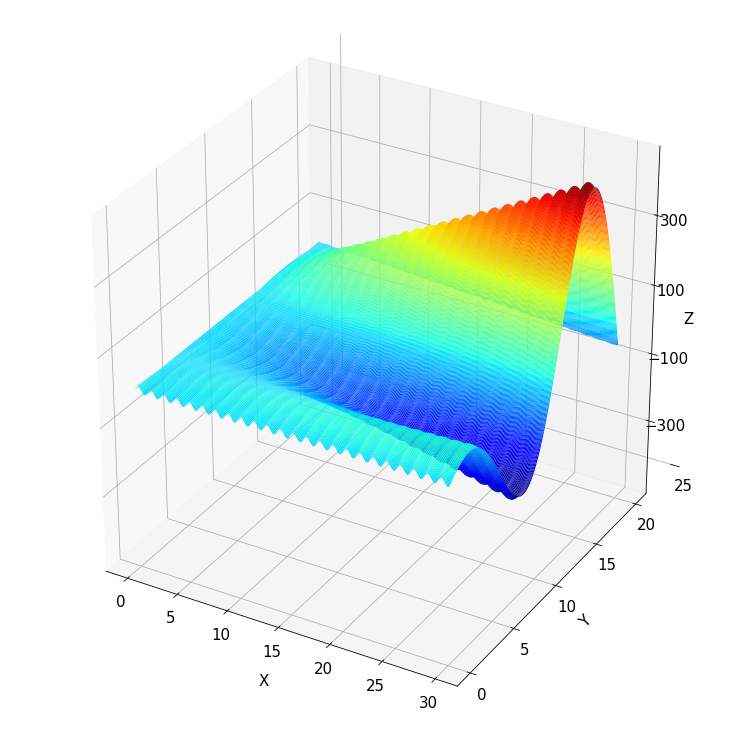

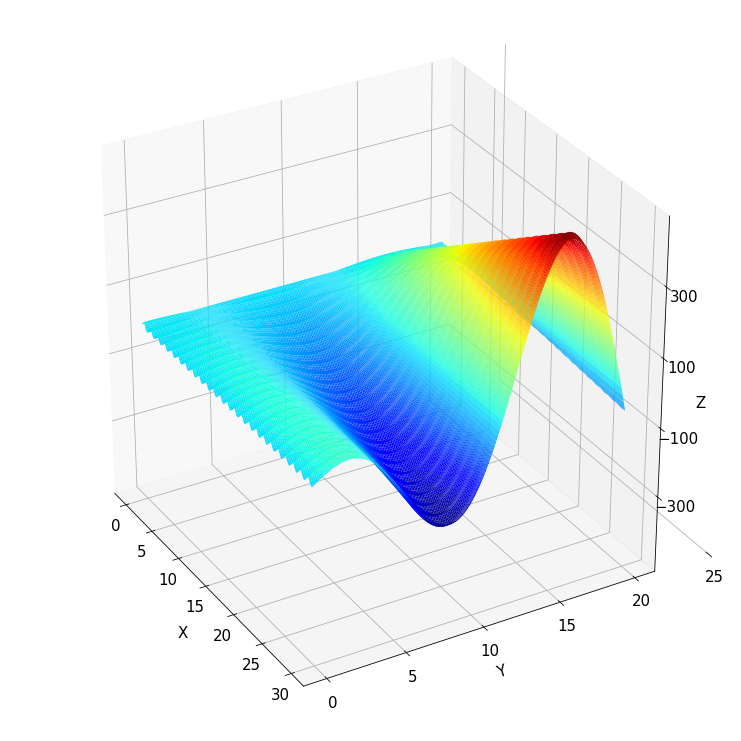

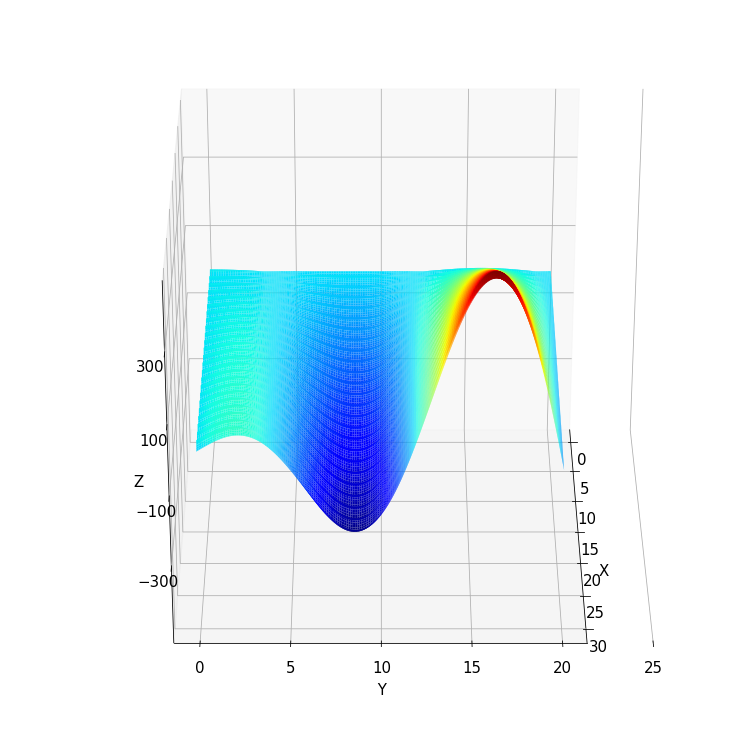

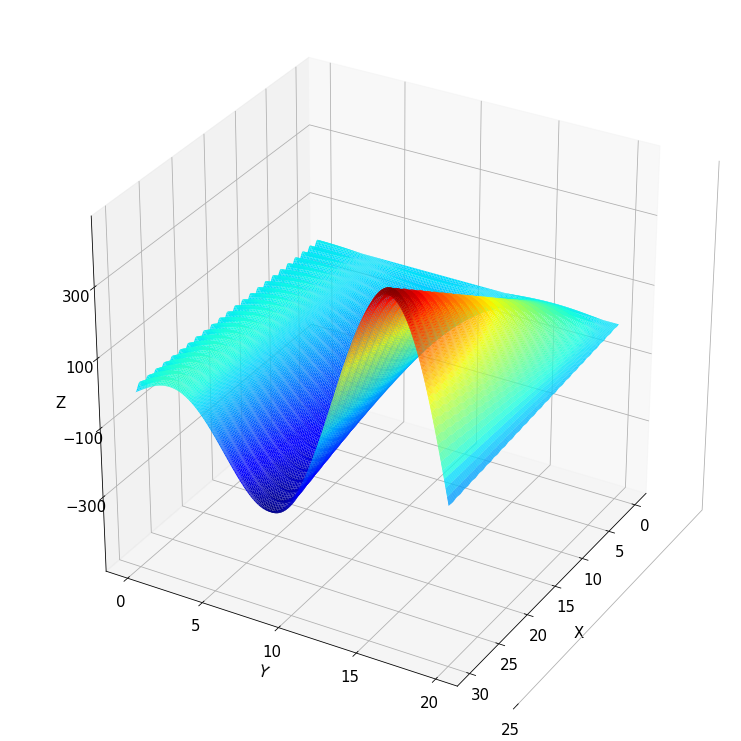

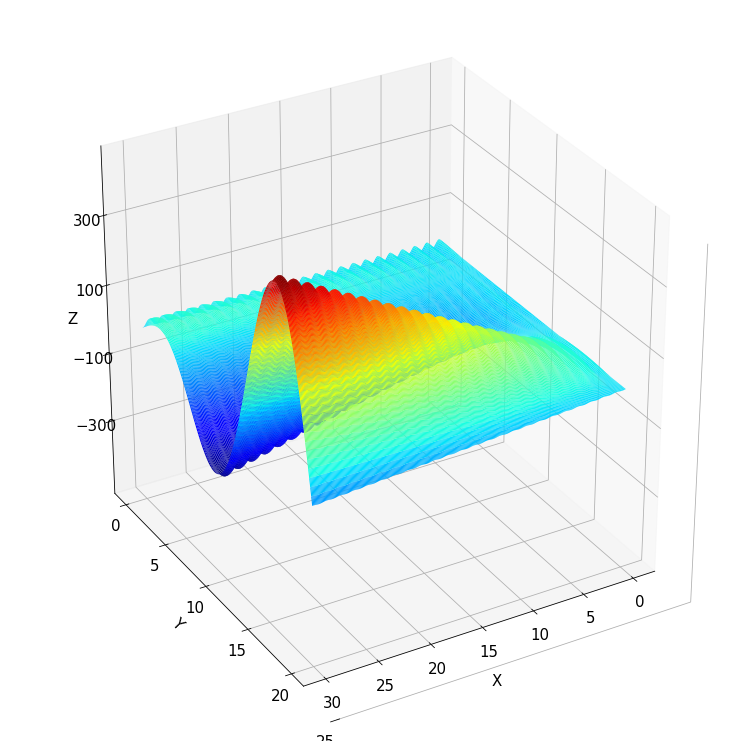

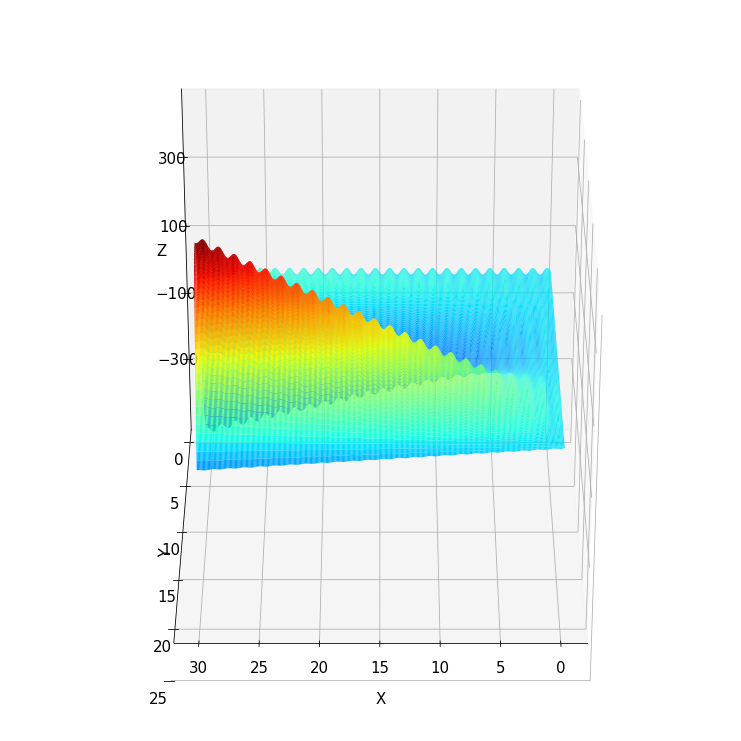

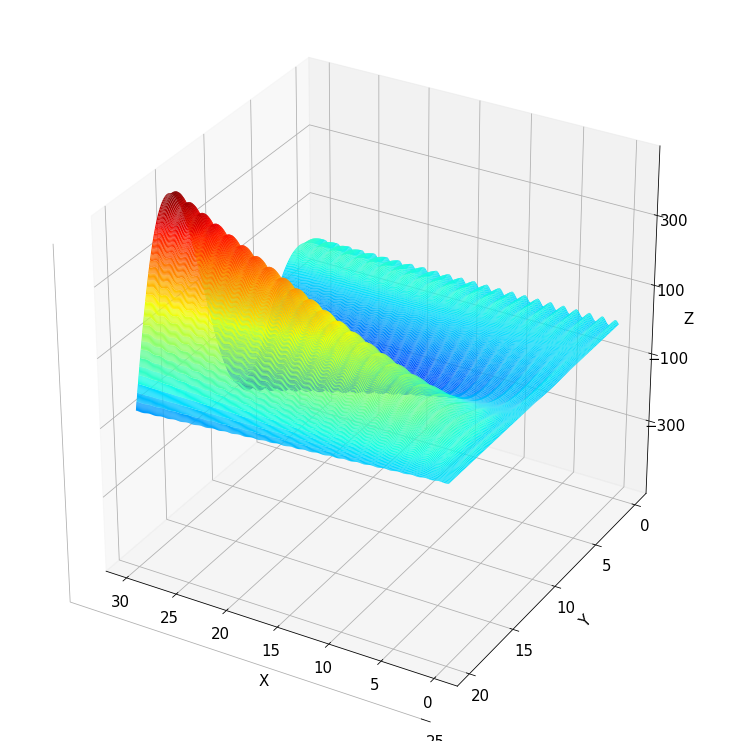

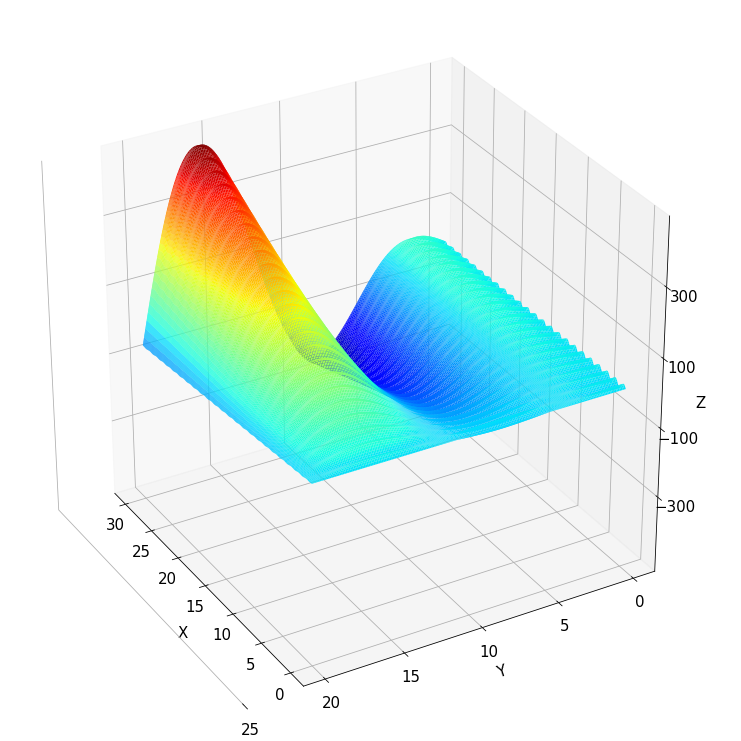

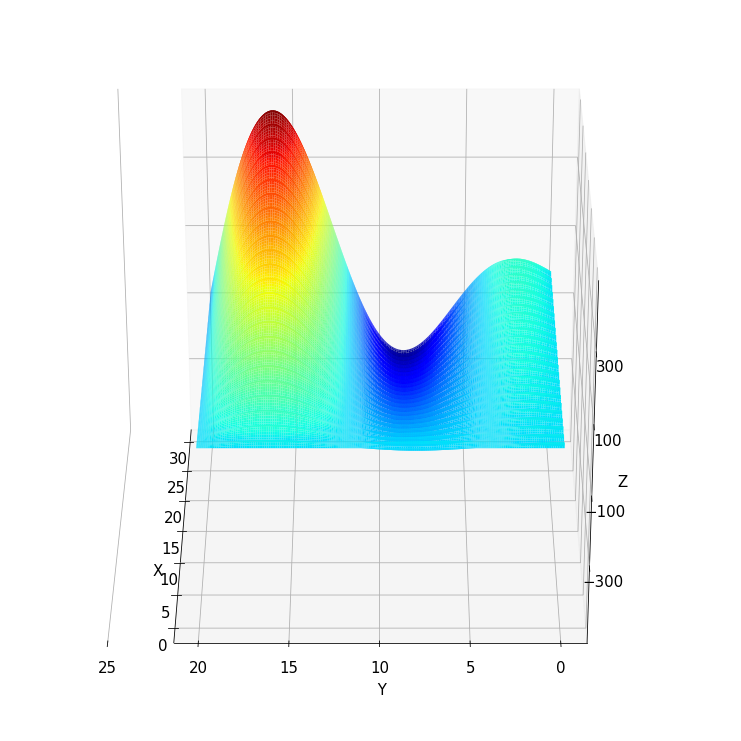

In [55]:
x = np.arange(0,30,0.1)
y = np.arange(0,20,0.1)
X, Y = np.meshgrid(x, y)
zvv = fxy1(X,Y)
for angle in [-60,-30,0,30,60,90,120,150,180]:
    fig = plt.figure(figsize=(10,10))
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, zvv, rstride=1, cstride=1, cmap=mpl.cm.jet)
    ax.set_xlabel('\n\nX')
    ax.set_ylabel('    \n Y')
    ax.set_yticks(np.arange(0,30,5))
    ax.set_zlabel('Z')
    ax.set_zticks(np.arange(-300,450,200))
    ax.set_zlim(bottom=-500)
    ax.view_init(30, angle)
    plt.show()